In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt_kwargs = {'figsize': (10, 4)}
from IPython.display import HTML

In [405]:
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon", "iso"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade", "gekko"},
             "controller": {"brimstone", "omen", "viper", "astra", "harbor"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber", "deadlock"}}
allagents = set()
for role, l in roles.items():
    allagents = allagents.union(set(l))

In [406]:
alpha = 5 #Eco rating parameters
beta = -5

In [407]:
#Rating for a round: winning with low credits earns more rating than winning with high credits, losing with more credits earns more negative rating.
def EcoRoundRating(LoadOutA, LoadoutB,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if OutcomeA == 1:
        return alpha*LoadoutB/LoadOutA
    if OutcomeA == 0:
        return beta*LoadOutA/LoadoutB
    
def EcoRoundRating1(LoadOutA, LoadoutB, Eco_type_A, Eco_type_B,  OutcomeA):
    LoadoutB = max(LoadoutB, 100)
    LoadOutA = max(LoadOutA, 100)
    if Eco_type_A == Eco_type_B:
        if OutcomeA == 1:
            return alpha*LoadoutB/LoadOutA
        if OutcomeA == 0:
            return beta*LoadOutA/LoadoutB
    if Eco_type_A != Eco_type_B:
        if OutcomeA == 1:
            return LoadoutB/LoadOutA
        if OutcomeA == 0:
            return LoadOutA/LoadoutB
    

In [408]:
players_stats = pd.read_csv("../data/vct_2022/players_stats/players_stats.csv")
overview = pd.read_csv("../data/vct_2022/matches/overview.csv")
maps_scores = pd.read_csv("../data/vct_2022/matches/maps_scores.csv")
eco_rounds = pd.read_csv("../data/vct_2022/matches/eco_rounds.csv")

In [409]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [410]:
len(players_stats[players_stats["Rating"].isna()])

135

In [411]:
len(eco_rounds[eco_rounds["Loadout Value"].isna()])

0

In [412]:
players_stats = players_stats[['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents', 'Rating']]

players_stats["Agents"] = players_stats["Agents"].apply(lambda x: x.replace(" ", ""))

#players_stats

Filling the none values in player rating with the average rating of the player/team.

In [413]:
players_stats = players_stats[players_stats.Agents.isin(allagents)]
grouped1 = players_stats.groupby(["Player", "Team", "Agents"])
players_stats.loc[:,"Rating"] = grouped1["Rating"].transform(lambda x: x.fillna(x.mean()))
grouped2 = players_stats.groupby(["Player", "Team"])
players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))
grouped3 = players_stats.groupby(["Team"])
players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()
players_stats = players_stats[~players_stats.Rating.isna()]
players_stats.sort_values(by=["Rating"], ascending=False).head(20)

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
93970,Champions Tour CIS Stage 1: Challengers 2,Open Qualifier,Round of 64,RHEA,next_viigraem,omen,2.69
114469,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 64,marteen,Straight Outta Retirement,raze,2.67
101886,Champions Tour Europe Stage 1: Challengers 2,Open Qualifier,Round of 128,Dev0,Human Tripwires,raze,2.55
110691,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,speedy,Dame Time,raze,2.42
68926,Champions Tour Korea Stage 1: Challengers,Open Qualifier: Round of 42,Group J,Blueming,Veni Vidi Vici,killjoy,2.39
112604,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,lowel,Team Heretics,brimstone,2.39
110385,Champions Tour Europe Stage 1: Challengers 1,Open Qualifier,Round of 256,ShadoW,Team Vitality,breach,2.38
16818,Champions Tour Korea Stage 2: Challengers,Open Qualifier,Group F,Sylvan,World Game Star,viper,2.34
80856,Champions Tour Indonesia Stage 1: Challengers,Group Stage,Opening (D),Famouz,BOY WITH LOVE,raze,2.33
99083,Champions Tour Europe Stage 1: Challengers 2,Open Qualifier,Round of 256,souzaseeds,F9 Hetic,chamber,2.29


Another file which has player rating

In [414]:
overview.sort_values(by=["Rating"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
104150,Champions Tour Philippines Stage 2: Challengers,Group Stage,Week 1,Team Secret vs South Built Esports,Haven,dispenser,Team Secret,killjoy,5.35,1139.0,...,0.0,0.0,5.0,100%,522.0,60%,0.0,0.0,0.0,defend
18370,Champions Tour North America Stage 2: Challengers,Open Qualifier #1,Round of 128,Clanless vs SYR,Icebox,Kehmicals,Clanless,jett,5.30,1085.0,...,0.0,0.0,4.0,100%,645.0,10%,1.0,0.0,1.0,attack
249676,Champions Tour Philippines Stage 1: Challengers,Open Qualifier,Lower Round 1,Alpha Esports Pro vs GrindSky Esports,Haven,ABATMAN,Alpha Esports Pro,killjoy,5.09,1125.0,...,0.0,0.0,9.0,100%,646.0,43%,0.0,0.0,0.0,attack
177032,Champions Tour North America Stage 1: Challengers,Open Qualifier #1,Round of 128,Complexity vs Burger Gaming,Haven,jcrueL,Complexity,jett,4.93,916.0,...,0.0,0.0,3.0,100%,493.0,50%,1.0,0.0,1.0,defend
266950,Champions Tour Japan Stage 1: Challengers Week 1,Open Qualifier,Group E,IGZIST vs SYSTEM e-Sports,Haven,oitaN,IGZIST,chamber,4.92,1275.0,...,0.0,0.0,5.0,100%,693.0,56%,1.0,0.0,1.0,attack


In this file, overview "rating" and "acs:average combat score" look off.  As in 2023, we will use rating data from players_stats file.

In [415]:
ind1 = overview["Side"] == "both"
ind2 = overview["Map"] != "All Maps"
ind = ind1 & ind2

overview = overview[ind]
overview = overview[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Player',
       'Team', 'Agents']]
overview

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,mindfreak,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,f0rsakeN,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Jinggg,Paper Rex,raze
...,...,...,...,...,...,...,...,...
379827,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Zyppan,FunPlus Phoenix,raze
379830,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ardiis,FunPlus Phoenix,kayo
379833,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ANGE1,FunPlus Phoenix,viper
379836,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Shao,FunPlus Phoenix,astra


In [416]:
rating_df = overview.merge(players_stats, on=['Tournament', 'Stage', 'Match Type', 'Player', "Agents", "Team"], how="left")

rating_df

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,0.96
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.15
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,mindfreak,Paper Rex,astra,1.07
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,f0rsakeN,Paper Rex,chamber,1.01
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Jinggg,Paper Rex,raze,0.89
...,...,...,...,...,...,...,...,...,...
88512,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Zyppan,FunPlus Phoenix,raze,NaN
88513,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ardiis,FunPlus Phoenix,kayo,1.20
88514,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,ANGE1,FunPlus Phoenix,viper,1.10
88515,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,Shao,FunPlus Phoenix,astra,1.04


In [417]:
# I will just fill NaN with the average of team rating.
grouped4 = rating_df.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
rating_df["Rating"] = grouped4["Rating"].transform(lambda x: x.fillna(x.mean()))

# After first step I found there are still missing values.  Fill them with each individual player's average throughout this data.
grouped5 = rating_df.groupby(["Player"])
rating_df["Rating"] = grouped5["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df["Rating"] = rating_df.groupby(["Team"])["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df = rating_df[~rating_df.Rating.isna()]
rating_df.Rating.isna().sum()

0

In [418]:
grouped_rating_df = rating_df.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team'])["Rating"].agg("sum").reset_index()

grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3.300000
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,5.550000
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,3.750000
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,5.022993
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,5.437500
...,...,...,...,...,...,...,...
17698,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,3.860000
17699,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,6.860000
17700,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,3.912500
17701,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,6.210000


Following is one of the main data frame. It has team rating based on player rating.

In [419]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

print(len(final_rating_df))

final_rating_df = final_rating_df[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A', 'Team_A_win', 'Team_B_win', 'Team B', 'Team_A_rating', 'Team_B_rating']]

print(final_rating_df.isna().sum())

final_rating_df = final_rating_df.dropna()

print(len(final_rating_df))
final_rating_df

8884
Tournament        0
Stage             0
Match Type        0
Match Name        0
Map               0
Team A            0
Team_A_win        0
Team_B_win        0
Team B            0
Team_A_rating    83
Team_B_rating    84
dtype: int64
8792


,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_B_rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,True,False,CERBERUS Esports,5.550000,3.300000
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,True,False,CERBERUS Esports,5.022993,3.750000
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Persija Esports,False,True,Bonkers,4.530000,5.437500
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Fracture,Persija Esports,True,False,Bonkers,4.725000,4.333333
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,True,False,Bonkers,4.733333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...
8879,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,True,False,Salt Esports,4.960000,4.960000
8880,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Bind,Global Esports,True,False,M1syl and friends,6.320000,3.750000
8881,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,Global Esports,True,False,M1syl and friends,5.700000,3.860000
8882,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,False,True,God Particles,3.912500,6.860000


Next, we will work the economy data

In [420]:
eco_rounds["Outcome"] = eco_rounds["Outcome"].apply(lambda x: 1 if x == "Win" else 0)
eco_rounds["Loadout Value"] = eco_rounds["Loadout Value"].apply(lambda x: int(x.replace(".","").replace("k","00")))
eco_rounds["Remaining Credits"] = eco_rounds["Remaining Credits"].apply(lambda x: int(x.replace(".","").replace("k","00")))

half_eco_rounds = eco_rounds.loc[ (eco_rounds["Round Number"]<13)]
eco_rounds.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Round Number,Team,Loadout Value,Remaining Credits,Type,Outcome
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,1,Paper Rex,3700,100,Eco: 0-5k,0
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,1,EDward Gaming,4000,200,Eco: 0-5k,1
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,2,Paper Rex,1200,9600,Eco: 0-5k,0
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,2,EDward Gaming,15600,2400,Semi-buy: 10-20k,1
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,3,Paper Rex,21300,700,Full buy: 20k+,0
5,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,3,EDward Gaming,15100,9500,Semi-buy: 10-20k,1
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,4,Paper Rex,8600,8400,Semi-eco: 5-10k,0
7,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,4,EDward Gaming,25700,16100,Full buy: 20k+,1
8,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,5,Paper Rex,22200,2200,Full buy: 20k+,0
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,5,EDward Gaming,26100,17000,Full buy: 20k+,1


In [421]:
team_ab_2022 = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team B"]]

team_ab_2022

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team B
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,EDward Gaming
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,EDward Gaming
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,EDward Gaming
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,Team Liquid
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,Team Liquid
...,...,...,...,...,...,...,...
8879,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Bind,Natus Vincere,FunPlus Phoenix
8880,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Icebox,Natus Vincere,FunPlus Phoenix
8881,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Breeze,Natus Vincere,FunPlus Phoenix
8882,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Haven,Natus Vincere,FunPlus Phoenix


In [422]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team']

Eco_rounds_ab_2022=\
pd.merge(
    team_ab_2022.rename(columns={"Team A":"Team"})\
    ,eco_rounds\
    ,on=keys
)\
.rename(columns={"Loadout Value":"Loadout_A", "Remaining Credits":"Remaining_credit_A", "Type":"Eco_type_A", "Outcome":"Outcome_A"})\
.rename(columns={"Team":"Team A", "Team B":"Team"})\
.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
.join(eco_rounds\
      .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map','Team', 'Round Number'])\
)\
.reset_index()\
.rename(columns={"Loadout Value":"Loadout_B", "Remaining Credits":"Remaining_credit_B", "Type":"Eco_type_B", "Outcome":"Outcome_B"})\
.rename(columns={"Team":"Team B"})

#Eco_rounds_ab_2022.head()

In [423]:
Eco_rounds_ab_2022[[ "Eco_type_A", "Eco_type_B", "Outcome_A", "Round Number"]].groupby([ "Eco_type_A", "Eco_type_B", "Outcome_A"]).count()

Round Number
Eco_type_A       Eco_type_B       Outcome_A              
Eco: 0-5k        Eco: 0-5k        0                  8321
                                  1                  9497
                 Full buy: 20k+   0                   649
                                  1                    91
                 Semi-buy: 10-20k 0                  6643
                                  1                   701
                 Semi-eco: 5-10k  0                     3
                                  1                     2
Full buy: 20k+   Eco: 0-5k        0                    77
                                  1                   741
                 Full buy: 20k+   0                 31204
                                  1                 35179
                 Semi-buy: 10-20k 0                  8490
                                  1                 16129
                 Semi-eco: 5-10k  0                  2084
                                  1                 10186
Semi-buy: 10-20k Eco: 0-5k        0                   605
                                  1                  7574
                 Full buy: 20k+   0                 13432
                                  1                  8581
                 Semi-buy: 10-20k 0                  2572
                                  1                  3003
                 Semi-eco: 5-10k  0                   269
                                  1                  1217
Semi-eco: 5-10k  Eco: 0-5k        0                     1
                                  1                     3
                 Full buy: 20k+   0                  8083
                                  1                  2079
                 Semi-buy: 10-20k 0                   975
                                  1                   280
                 Semi-eco: 5-10k  0                     1
                                  1                     3

In [424]:
Eco_rounds_ab_2022["Eco_Round_Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A"]]\
    .apply(lambda row: EcoRoundRating(row["Loadout_A"], row["Loadout_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Eco_Round_Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B"]]\
    .apply(lambda row: EcoRoundRating(row["Loadout_B"], row["Loadout_A"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

# RoundRating2
Eco_rounds_ab_2022["Eco_Round_Rating_A"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_A", "Eco_type_A", "Eco_type_B"]]\
    .apply(lambda row: EcoRoundRating1(row["Loadout_A"],  row["Loadout_B"],row["Eco_type_A"], row["Eco_type_B"], row["Outcome_A"]), axis=1)

Eco_rounds_ab_2022["Eco_Round_Rating_B"]=Eco_rounds_ab_2022[["Loadout_A", "Loadout_B", "Outcome_B",  "Eco_type_A", "Eco_type_B"]]\
    .apply(lambda row: EcoRoundRating1(row["Loadout_B"], row["Loadout_A"], row["Eco_type_A"], row["Eco_type_B"], row["Outcome_B"]), axis=1)


Eco_rounds_ab_2022.head(10)

,Tournament,Stage,Match Type,Match Name,Map,Team B,Round Number,Team A,Loadout_A,Remaining_credit_A,Eco_type_A,Outcome_A,Loadout_B,Remaining_credit_B,Eco_type_B,Outcome_B,Eco_Round_Rating_A,Eco_Round_Rating_B
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,1,Made in Thailand,2900,600,Eco: 0-5k,1,3800,200,Eco: 0-5k,0,6.551724,-6.551724
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,2,Made in Thailand,16400,500,Semi-buy: 10-20k,1,3300,9000,Eco: 0-5k,0,0.201220,0.201220
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,3,Made in Thailand,18800,13100,Semi-buy: 10-20k,0,21700,400,Full buy: 20k+,1,0.866359,0.866359
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,4,Made in Thailand,22400,1700,Full buy: 20k+,0,22800,7200,Full buy: 20k+,1,-4.912281,4.912281
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,5,Made in Thailand,9100,8500,Semi-eco: 5-10k,0,21900,3200,Full buy: 20k+,1,0.415525,0.415525
5,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,6,Made in Thailand,21900,2500,Full buy: 20k+,1,22600,6800,Full buy: 20k+,0,5.159817,-5.159817
6,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,7,Made in Thailand,21700,3400,Full buy: 20k+,1,11400,11200,Semi-buy: 10-20k,0,0.525346,0.525346
7,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,8,Made in Thailand,24100,7200,Full buy: 20k+,0,24400,9300,Full buy: 20k+,1,-4.938525,4.938525
8,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,9,Made in Thailand,23300,3200,Full buy: 20k+,1,24300,19000,Full buy: 20k+,0,5.214592,-5.214592
9,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,10,Made in Thailand,21400,3000,Full buy: 20k+,1,22500,9200,Full buy: 20k+,0,5.257009,-5.257009


In [425]:
Half_Eco_rounds_ab_2022 = Eco_rounds_ab_2022.loc[Eco_rounds_ab_2022["Round Number"]<13]
#Half_Eco_rounds_ab_2022

Rating for a match is average of the round rating.

In [426]:
grouped_eco_rating_df_A = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Eco_Round_Rating_A"].agg("mean").reset_index()
grouped_eco_rating_df_B = Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Eco_Round_Rating_B"].agg("mean").reset_index()


In [427]:
half_grouped_eco_rating_df_A = Half_Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])["Eco_Round_Rating_A"].agg("mean").reset_index()
half_grouped_eco_rating_df_B = Half_Eco_rounds_ab_2022.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])["Eco_Round_Rating_B"].agg("mean").reset_index()

In [428]:
final_eco_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_eco_rating_df_A\
                        .rename(columns={"Eco_Round_Rating_A":"Team_A_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_eco_rating_df_B\
                        .rename(columns={"Eco_Round_Rating_B":"Team_B_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [429]:
final_eco_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_eco_rating,Team_B_eco_rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,Made in Thailand,13,True,8,False,1.428790,-0.692812
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,Made in Thailand,13,True,3,False,1.650814,-1.161166
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,Persija Esports,15,False,17,True,0.447176,-0.114089
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Fracture,Bonkers,Persija Esports,15,True,13,False,-0.165282,0.553120
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Bonkers,Persija Esports,15,True,13,False,1.624219,-1.201737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,Salt Esports,M1syl and friends,13,True,11,False,0.949272,-0.396852
8880,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Bind,M1syl and friends,Global Esports,13,True,4,False,1.629988,-0.744042
8881,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,Global Esports,13,True,8,False,1.016459,-0.354172
8882,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,Maruti Peek,3,False,13,True,-0.716743,1.214793


In [430]:
final_rating_df.columns

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team_A_win', 'Team_B_win', 'Team B', 'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [431]:
final_eco_rating_df = final_eco_rating_df[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win',
       'Team_A_eco_rating', 'Team_B_eco_rating']]

In [432]:
final_eco_rating_df.columns

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win', 'Team_A_eco_rating',
       'Team_B_eco_rating'],
      dtype='object')

In [433]:
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team B', 'Team_A_win', 'Team_B_win']

final_df=\
pd.merge(
    final_rating_df, final_eco_rating_df,on=keys
)

final_df

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_B_rating,Team_A_eco_rating,Team_B_eco_rating
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,True,False,CERBERUS Esports,5.550000,3.300000,1.428790,-0.692812
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,True,False,CERBERUS Esports,5.022993,3.750000,1.650814,-1.161166
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Persija Esports,False,True,Bonkers,4.530000,5.437500,0.447176,-0.114089
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Fracture,Persija Esports,True,False,Bonkers,4.725000,4.333333,-0.165282,0.553120
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Haven,Persija Esports,True,False,Bonkers,4.733333,5.600000,1.624219,-1.201737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Round 1,M1syl and friends vs Salt Esports,Haven,M1syl and friends,True,False,Salt Esports,4.960000,4.960000,0.949272,-0.396852
8796,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Bind,Global Esports,True,False,M1syl and friends,6.320000,3.750000,1.629988,-0.744042
8797,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,Global Esports,True,False,M1syl and friends,5.700000,3.860000,1.016459,-0.354172
8798,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,False,True,God Particles,3.912500,6.860000,-0.716743,1.214793


In [434]:
half_final_eco_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(half_grouped_eco_rating_df_A\
                        .rename(columns={"Round_Rating_A":"Team_A_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(half_grouped_eco_rating_df_B\
                        .rename(columns={"Round_Rating_B":"Team_B_eco_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()

In [435]:
final_eco_rating_df=final_eco_rating_df.dropna()
half_final_eco_rating_df=half_final_eco_rating_df.dropna()

We will train on pre Valorant Champions and test on the championship

In [436]:
final_df_train = final_df.loc[final_df["Tournament"]!= "Valorant Champions 2022"]
final_df_test  = final_df.loc[final_df["Tournament"]== "Valorant Champions 2022"]
final_df_test = final_df_test[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team_A_win', 'Team_B_win', 'Team B']]


In [437]:
#Take ave over team and map

final_rating_df_A_from_before = final_df_train.groupby(['Team A'])["Team_A_rating"].agg("mean").reset_index()
final_rating_df_B_from_before = final_df_train.groupby(['Team B'])["Team_B_rating"].agg("mean").reset_index()
final_eco_rating_df_A_from_before = final_df_train.groupby(['Team A'])["Team_A_eco_rating"].agg("mean").reset_index()
final_eco_rating_df_B_from_before = final_df_train.groupby(['Team B'])["Team_B_eco_rating"].agg("mean").reset_index()
#print(grouped_rating_df_A.head())
print(final_rating_df_A_from_before.head(20))

                 Team A  Team_A_rating
0                 0Zero       6.318000
1           100 Thieves       5.303833
2                100paz       4.440000
3                  1337       5.762500
4               18again       3.850000
5             19esports       5.988000
6              1Percent       4.490000
7      1gameandwegohome       4.402857
8           3 Gün Yeter       6.651250
9           303 Esports       4.892500
10             36NUMBER       6.200000
11           3P eSports       5.256667
12      4 ruim e 1 ruim       5.200000
13            47 Gaming       5.469821
14            5 SAHABAT       3.820000
15          5 of a Kind       3.670000
16               5MOKES       4.801000
17               5ORDIC       5.595000
18  717 Monster Esports       4.534000
19              9z Team       4.772500


In [438]:
final_df_test = final_df_test.merge(final_rating_df_A_from_before, on=["Team A"], how="left")
final_df_test = final_df_test.merge(final_eco_rating_df_A_from_before, on=["Team A"], how="left")
final_df_test

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_A_eco_rating
0,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Ascent,Paper Rex,False,True,Team Liquid,5.750686,1.132443
1,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Paper Rex,False,True,Team Liquid,5.750686,1.132443
2,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Pearl,Paper Rex,True,False,Team Liquid,5.750686,1.132443
3,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Ascent,LOUD,True,False,ZETA DIVISION,5.731016,0.912990
4,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Bind,LOUD,True,False,ZETA DIVISION,5.731016,0.912990
...,...,...,...,...,...,...,...,...,...,...,...
81,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Breeze,DRX,False,True,LOUD,5.655472,1.050667
82,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Haven,DRX,False,True,LOUD,5.655472,1.050667
83,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Ascent,OpTic Gaming,False,True,XSET,5.103298,0.679622
84,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Haven,OpTic Gaming,True,False,XSET,5.103298,0.679622


In [439]:
final_df_test = final_df_test.merge(final_rating_df_B_from_before, on=["Team B"], how="left")
final_df_test = final_df_test.merge(final_eco_rating_df_B_from_before, on=["Team B"], how="left")
#champs_rating_overall_df.isna().sum()
print(len(final_df_test))
final_df_test = final_df_test.dropna()
final_df_train = final_df_train.dropna()
final_df_test


86


,Tournament,Stage,Match Type,Match Name,Map,Team A,Team_A_win,Team_B_win,Team B,Team_A_rating,Team_A_eco_rating,Team_B_rating,Team_B_eco_rating
0,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Ascent,Paper Rex,False,True,Team Liquid,5.750686,1.132443,5.146230,0.421566
1,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Haven,Paper Rex,False,True,Team Liquid,5.750686,1.132443,5.146230,0.421566
2,Valorant Champions 2022,Group Stage,Decider (A),Paper Rex vs Team Liquid,Pearl,Paper Rex,True,False,Team Liquid,5.750686,1.132443,5.146230,0.421566
3,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Ascent,LOUD,True,False,ZETA DIVISION,5.731016,0.912990,5.330923,0.726856
4,Valorant Champions 2022,Group Stage,Decider (B),LOUD vs ZETA DIVISION,Bind,LOUD,True,False,ZETA DIVISION,5.731016,0.912990,5.330923,0.726856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Breeze,DRX,False,True,LOUD,5.655472,1.050667,6.034444,1.397748
82,Valorant Champions 2022,Playoffs,Upper Semifinals,DRX vs LOUD,Haven,DRX,False,True,LOUD,5.655472,1.050667,6.034444,1.397748
83,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Ascent,OpTic Gaming,False,True,XSET,5.103298,0.679622,5.252367,0.525905
84,Valorant Champions 2022,Playoffs,Upper Semifinals,OpTic Gaming vs XSET,Haven,OpTic Gaming,True,False,XSET,5.103298,0.679622,5.252367,0.525905


In [440]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression on Team_A_Rating and Team_B_Rating

In [441]:
lr1 = LogisticRegression()
X1_train = final_df_train[["Team_A_rating", "Team_B_rating"]]
y1_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X1_test = final_df_test[["Team_A_rating", "Team_B_rating"]]
y1_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)


In [442]:
print(len(X1_train), len(y1_train), len(X1_test), len(y1_test))

8681 8681 83 83


In [443]:
lr1.fit(X1_train, y1_train)
pred1 = lr1.predict(X1_test)
acc1 = accuracy_score(y1_test, pred1)
print("mean of true values:", np.mean(y1_test))
print("mean of prediction:", np.mean(pred1))
print("Accuracy:", acc1)
lr1.coef_

mean of true values: 0.5542168674698795
mean of prediction: 0.5301204819277109
Accuracy: 0.6144578313253012


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 2.37850836, -2.31399815]])

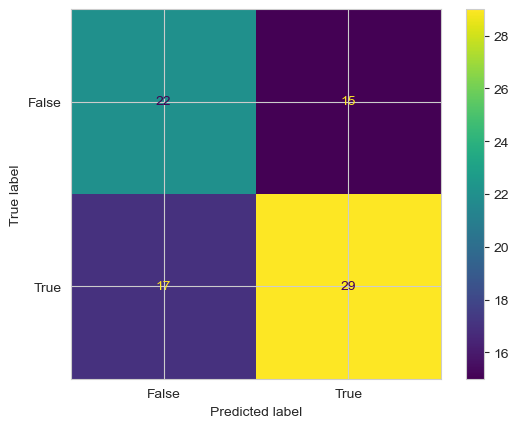

In [444]:
cm1 = confusion_matrix(y1_test, pred1, labels=lr1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=lr1.classes_)
disp1.plot()
plt.show()

Logistic Regression on Team_A_Eco_Rating and Team_B_Eco_Rating

In [445]:
lr2 = LogisticRegression()
X2_train = final_df_train[["Team_A_eco_rating", "Team_B_eco_rating"]]
y2_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X2_test = final_df_test[["Team_A_eco_rating", "Team_B_eco_rating"]]
y2_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [446]:
print(len(X2_train), len(y2_train), len(X2_test), len(y2_test))

8681 8681 83 83


In [447]:
lr2.fit(X2_train, y2_train)
pred2 = lr2.predict(X2_test)
acc2 = accuracy_score(y2_test, pred2)
print("mean of true values:", np.mean(y2_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)
lr2.coef_

mean of true values: 0.5542168674698795
mean of prediction: 0.6987951807228916
Accuracy: 0.6626506024096386


c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.83873282, -1.73237602]])

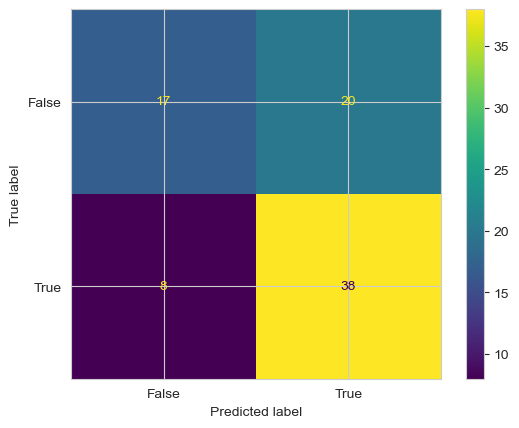

In [448]:
cm2 = confusion_matrix(y2_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

Logistic Regression on both

In [449]:
lr3 = LogisticRegression()
X3_train = final_df_train[["Team_A_eco_rating", "Team_B_eco_rating", "Team_A_rating", "Team_B_rating"]]
y3_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X3_test = final_df_test[["Team_A_eco_rating", "Team_B_eco_rating", "Team_A_rating", "Team_B_rating"]]
y3_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [450]:
print(len(X3_train), len(y3_train), len(X3_test), len(y3_test))

8681 8681 83 83


In [451]:
lr3.fit(X3_train, y3_train)
pred3 = lr3.predict(X3_test)
acc3 = accuracy_score(y3_test, pred3)
print("mean of true values:", np.mean(y3_test))
print("mean of prediction:", np.mean(pred3))
print("Accuracy:", acc3)
lr3.coef_

c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean of true values: 0.5542168674698795
mean of prediction: 0.5903614457831325
Accuracy: 0.6506024096385542


array([[ 1.59084111, -1.35594905,  2.27622807, -2.1063464 ]])

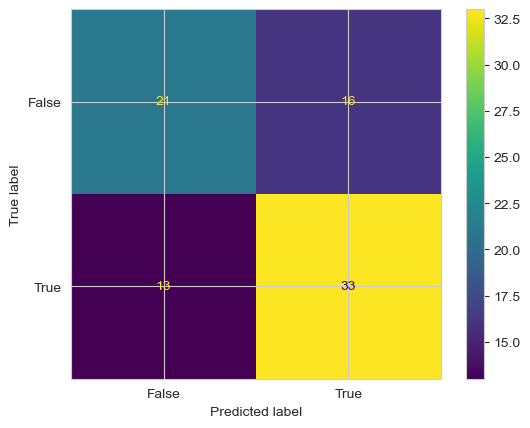

In [452]:
cm3 = confusion_matrix(y3_test, pred3, labels=lr3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=lr3.classes_)
disp3.plot()
plt.show()

In [453]:
print((29+22)/(29+22+17+15))

0.6144578313253012


In [454]:
lr4 = LogisticRegression()
X4_train = final_df_train[["Team_A_rating"]]
y4_train = final_df_train.Team_A_win.to_numpy().reshape(-1,1)

X4_test = final_df_test[["Team_A_rating"]]
y4_test = final_df_test.Team_A_win.to_numpy().reshape(-1,1)

In [455]:
lr4.fit(X4_train, y4_train)
pred4 = lr4.predict(X4_test)
acc4 = accuracy_score(y4_test, pred4)
print("mean of true values:", np.mean(y4_test))
print("mean of prediction:", np.mean(pred4))
print("Accuracy:", acc4)
lr4.coef_

c:\Users\parab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean of true values: 0.5542168674698795
mean of prediction: 1.0
Accuracy: 0.5542168674698795


array([[3.84025986]])

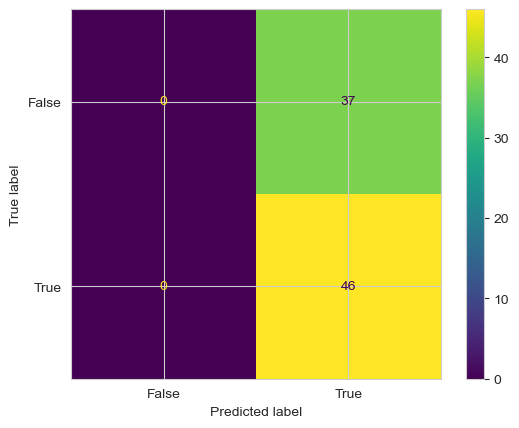

In [456]:
cm4 = confusion_matrix(y4_test, pred4, labels=lr4.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=lr4.classes_)
disp4.plot()
plt.show()